# Android Malware Analysis

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

## Dataset

The dataset is available at Kaggle, [Dataset malware/beningn permissions Android](https://www.kaggle.com/xwolf12/datasetandroidpermissions#train.csv).


In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv", header=0, sep=";")

In [0]:
data

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [0]:
data['android']

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Name: android, Length: 398, dtype: int64

In [0]:
data['type']

0      1
1      1
2      1
3      1
4      1
      ..
393    0
394    0
395    0
396    0
397    0
Name: type, Length: 398, dtype: int64

In [0]:
data.iloc[10:20,4:8]

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM
10,0,0,0,0
11,0,0,0,0
12,0,0,0,0
13,0,0,0,0
14,0,0,0,0
15,0,0,0,0
16,0,0,0,0
17,0,0,0,0
18,0,0,0,0
19,0,0,0,0


In [0]:
X=data.iloc[:, 1:330]

X

,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,android.permission.BIND_CARRIER_MESSAGING_SERVICE,...,com.android.cts.permissionNotUsedWithSignature,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
y=data.iloc[:,330]

y

0      1
1      1
2      1
3      1
4      1
      ..
393    0
394    0
395    0
396    0
397    0
Name: type, Length: 398, dtype: int64

## Data exploration¶


In [0]:
data.shape

(398, 331)

In [0]:
data.columns

Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

### Feature Description

* **android.permission.ACCESS_ALL_EXTERNAL_STORAGE**: Permision to read and write   files to your phone’s external storage.

*  **android.permission.ACCESS_COARSE_LOCATION** : Permission to get your location based on network sources such as phone masts and Wi-Fi networks, but only when the app is in the foreground. These location services must be turned on and available on your phone for the app to be able to use them.

*  **android.permission.ACCESS_BLUETOOTH_SHARE**: Permission to perform any Bluetooth communication, such as requesting a connection, accepting a connection, and transferring data.

*  **android.permission.ACCESS_CHECKIN_PROPERTIES** : Allows read/write access to the "properties" table in the checkin database, to change values that get uploaded.

*  **android.permission.ACCESS_CACHE_FILESYSTEM** :  Allows an application to read and write the cache file system




In [0]:
data.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [0]:
data.tail(8)

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
data.describe()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.0,398.000000,398.000000,398.0,398.000000,398.0,398.0,398.0,398.000000,398.000000,398.0,398.0,398.000000,398.0,398.0,398.0,398.000000,398.000000,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.0,398.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.000000,398.000000,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0

## Data Visualizations¶


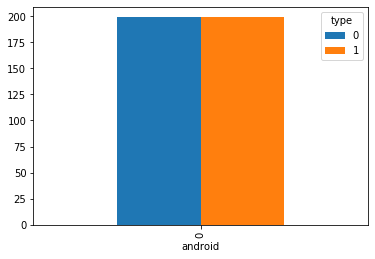

In [0]:
pd.crosstab(data.android,data.type).plot(kind='bar')
plt.show()

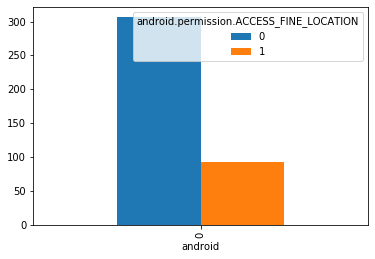

In [0]:
pd.crosstab(data['android'],data['android.permission.ACCESS_FINE_LOCATION']).plot(kind='bar')
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
X_train

,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,android.permission.BIND_CARRIER_MESSAGING_SERVICE,...,com.android.cts.permissionNotUsedWithSignature,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
X_test

,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,android.permission.BIND_CARRIER_MESSAGING_SERVICE,...,com.android.cts.permissionNotUsedWithSignature,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Using Logistic Regression




In [0]:
logreg = LogisticRegression()

In [0]:
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)


## Calculating Accuracy

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.90
